In [1]:
import yfinance as yf
import pandas as pd

In [2]:
#Get stock data
Facebook = yf.Ticker("META")
Facebook = Facebook.history(period="max")

Amazon = yf.Ticker("AMZN")
Amazon = Amazon.history(period="max")

Apple = yf.Ticker("AAPL")
Apple = Apple.history(period="max")

Tesla = yf.Ticker("TSLA")
Tesla = Tesla.history(period="max")

Google = yf.Ticker("GOOGL")
Google = Google.history(period="max")

In [3]:
import numpy as np

In [4]:
#Get the close values for the stocks
FacebookC = Facebook.Close
FacebookC = np.array(FacebookC).reshape(-1,1)

AmazonC = Amazon.Close
AmazonC = np.array(AmazonC).reshape(-1,1)

AppleC = Apple.Close
AppleC = np.array(AppleC).reshape(-1,1)

TeslaC = Tesla.Close
TeslaC = np.array(TeslaC).reshape(-1,1)

GoogleC = Google.Close
GoogleC = np.array(GoogleC).reshape(-1,1)

In [5]:
import matplotlib.pyplot as plt

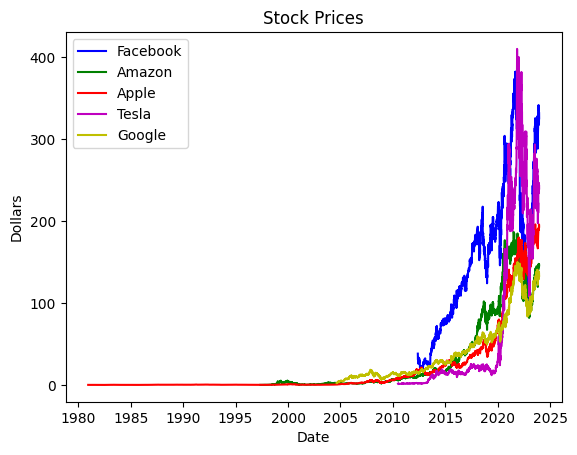

In [6]:
#Plot all the close values
plt.plot(Facebook.index, FacebookC, 'b', label = 'Facebook')
plt.plot(Amazon.index, AmazonC, 'g', label = 'Amazon')
plt.plot(Apple.index, AppleC, 'r', label = 'Apple')
plt.plot(Tesla.index, TeslaC, 'm', label = 'Tesla')
plt.plot(Google.index, GoogleC, 'y', label = 'Google')

plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Dollars')
plt.legend()
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
#Scale the data
scaler = StandardScaler()
AllC = np.vstack((FacebookC, AmazonC, AppleC, TeslaC, GoogleC))
scaler.fit_transform(AllC)

FacebookC = scaler.transform(FacebookC)
AmazonC = scaler.transform(AmazonC)
AppleC = scaler.transform(AppleC)
TeslaC = scaler.transform(TeslaC)
GoogleC = scaler.transform(GoogleC)

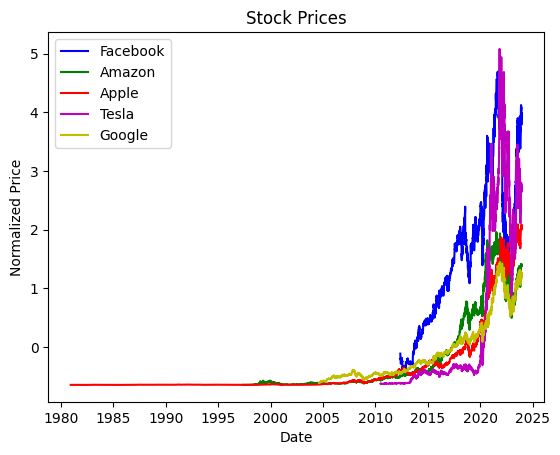

In [9]:
#Plot the scaled stocks
plt.plot(Facebook.index, FacebookC, 'b', label = 'Facebook')
plt.plot(Amazon.index, AmazonC, 'g', label = 'Amazon')
plt.plot(Apple.index, AppleC, 'r', label = 'Apple')
plt.plot(Tesla.index, TeslaC, 'm', label = 'Tesla')
plt.plot(Google.index, GoogleC, 'y', label = 'Google')

plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

In [10]:
#Split data into X and Y
#X is the close value for the 100 days before Y
FacebookX = []
FacebookY = []
for i in range(100, FacebookC.shape[0]):
    FacebookX.append(FacebookC[i-100:i])
    FacebookY.append(FacebookC[i])
FacebookX = np.array(FacebookX)
FacebookY = np.array(FacebookY)

AmazonX = []
AmazonY = []
for i in range(100, AmazonC.shape[0]):
    AmazonX.append(AmazonC[i-100:i])
    AmazonY.append(AmazonC[i])
AmazonX = np.array(AmazonX)
AmazonY = np.array(AmazonY)

AppleX = []
AppleY = []
for i in range(100, AppleC.shape[0]):
    AppleX.append(AppleC[i-100:i])
    AppleY.append(AppleC[i])
AppleX = np.array(AppleX)
AppleY = np.array(AppleY)

TeslaX = []
TeslaY = []
for i in range(100, TeslaC.shape[0]):
    TeslaX.append(TeslaC[i-100:i])
    TeslaY.append(TeslaC[i])
TeslaX = np.array(TeslaX)
TeslaY = np.array(TeslaY)

GoogleX = []
GoogleY = []
for i in range(100, GoogleC.shape[0]):
    GoogleX.append(GoogleC[i-100:i])
    GoogleY.append(GoogleC[i])
GoogleX = np.array(GoogleX)
GoogleY = np.array(GoogleY)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#Split the stocks individually into training and testing sets
FacebookX_train, FacebookX_test, FacebookY_train, FacebookY_test = train_test_split(FacebookX, FacebookY, test_size=0.1, shuffle=False)
AmazonX_train, AmazonX_test, AmazonY_train, AmazonY_test = train_test_split(AmazonX, AmazonY, test_size=0.1, shuffle=False)
AppleX_train, AppleX_test, AppleY_train, AppleY_test = train_test_split(AppleX, AppleY, test_size=0.1, shuffle=False)
TeslaX_train, TeslaX_test, TeslaY_train, TeslaY_test = train_test_split(TeslaX, TeslaY, test_size=0.1, shuffle=False)
GoogleX_train, GoogleX_test, GoogleY_train, GoogleY_test = train_test_split(GoogleX, GoogleY, test_size=0.1, shuffle=False)

In [13]:
#Combine the stocks into overall training and testing sets
AllX_train = np.vstack((FacebookX_train, AmazonX_train, AppleX_train, TeslaX_train, GoogleX_train))
AllY_train = np.vstack((FacebookY_train, AmazonY_train, AppleY_train, TeslaY_train, GoogleY_train))
AllX_test = np.vstack((FacebookX_test, AmazonX_test, AppleX_test, TeslaX_test, GoogleX_test))
AllY_test = np.vstack((FacebookY_test, AmazonY_test, AppleY_test, TeslaY_test, GoogleY_test))

In [14]:
import torch
import torch.nn as nn

In [15]:
#Turn the data into tensors
X_train_tensor = torch.Tensor(AllX_train)
y_train_tensor = torch.Tensor(AllY_train)
X_test_tensor = torch.Tensor(AllX_test)
y_test_tensor = torch.Tensor(AllY_test)

In [16]:
#Make the neural network outline
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [17]:
#Initialize the model
input_size = 1
hidden_size = 10
num_layers = 1
output_size = 1
model = LSTM(input_size, hidden_size, num_layers, output_size)

In [18]:
#Set training parameters
learning_rate = 0.01
epochs = 1000
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
#Train the model
for epoch in range(epochs):
    outputs = model(X_train_tensor)
    optimizer.zero_grad()
    training_loss = loss_function(outputs, y_train_tensor)
    training_loss.backward()
    optimizer.step()
    if(epoch % 100 == 99): 
        print(f'Epoch: {epoch+1}, Training loss: {training_loss.item()}')

Epoch: 100, Training loss: 0.00253285258077085
Epoch: 200, Training loss: 0.0014416208723559976
Epoch: 300, Training loss: 0.0012550323735922575
Epoch: 400, Training loss: 0.0011560211423784494
Epoch: 500, Training loss: 0.0010835066204890609
Epoch: 600, Training loss: 0.0010270841885358095
Epoch: 700, Training loss: 0.0009837260004132986
Epoch: 800, Training loss: 0.0009511322132311761
Epoch: 900, Training loss: 0.0009265796979889274
Epoch: 1000, Training loss: 0.0009075234993360937


In [20]:
#Make the predictions for the test set
with torch.no_grad():
    AllP_test = model(X_test_tensor)
    
    FacebookP_test = model(torch.Tensor(FacebookX_test))
    AmazonP_test = model(torch.Tensor(AmazonX_test))
    AppleP_test = model(torch.Tensor(AppleX_test))
    TeslaP_test = model(torch.Tensor(TeslaX_test))
    GoogleP_test = model(torch.Tensor(GoogleX_test))

In [21]:
#Check test loss
test_loss = loss_function(AllP_test, torch.Tensor(AllY_test))
print(f"Test loss: {test_loss.item()}")

Test loss: 0.003206480061635375


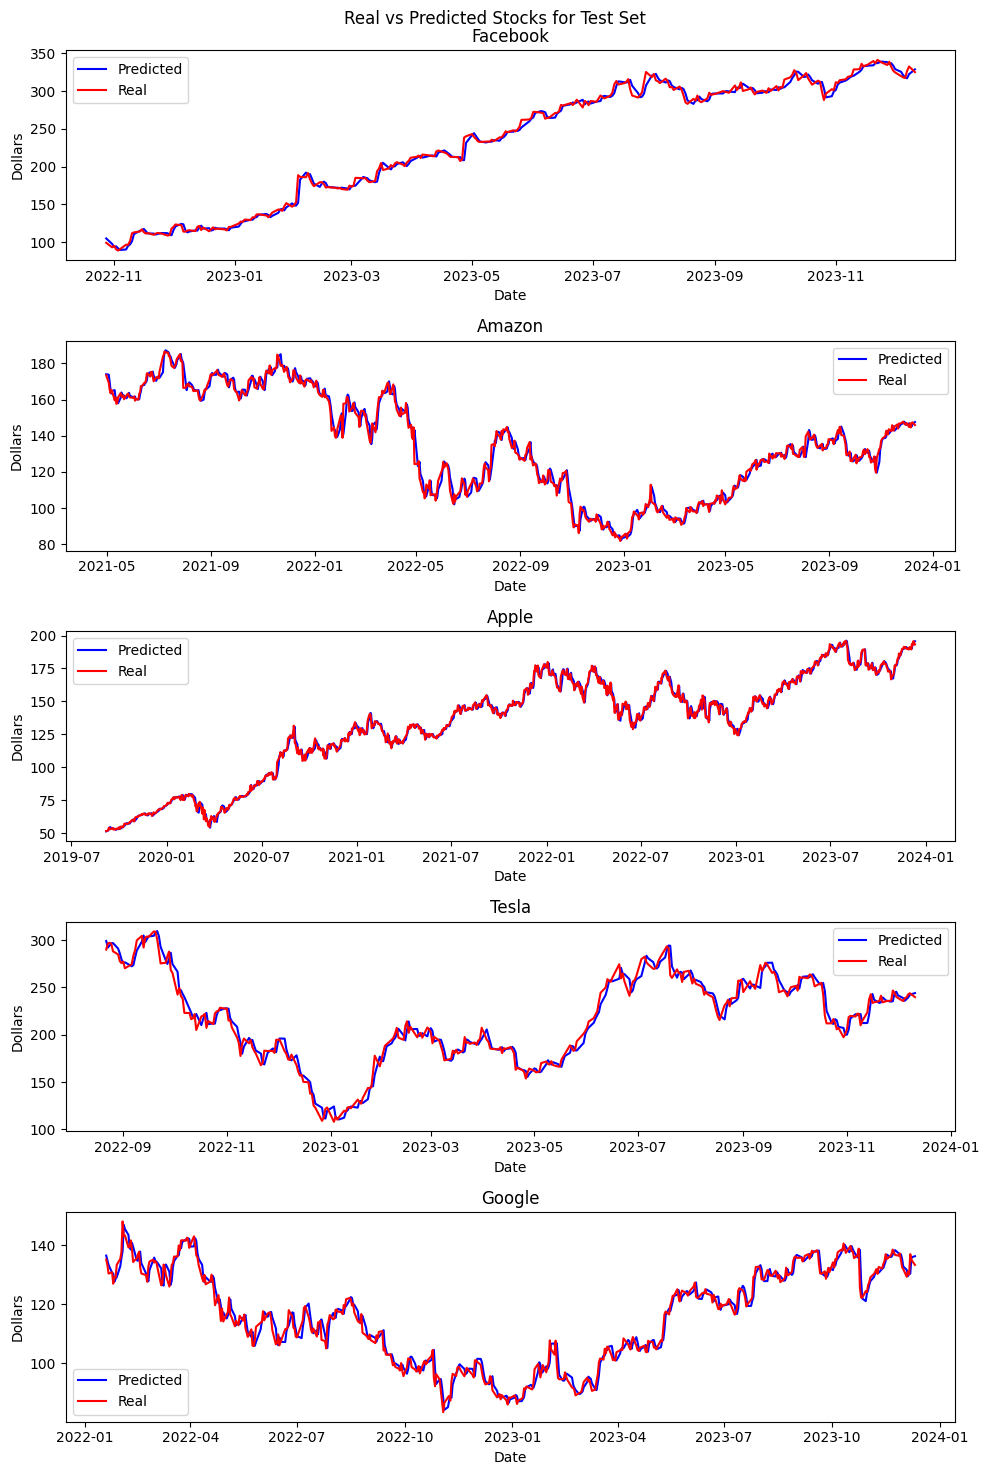

In [22]:
#Plot the unscaled predictions by company
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))
axes[0].plot(Facebook.index[-len(FacebookP_test):],scaler.inverse_transform(FacebookP_test), 'b', label = 'Predicted')
axes[0].plot(Facebook.index[-len(FacebookY_test):], scaler.inverse_transform(FacebookY_test), 'r', label = 'Real')
axes[0].set_title('Facebook')
axes[0].set_ylabel('Dollars')
axes[0].set_xlabel('Date')
axes[0].legend()

axes[1].plot(Amazon.index[-len(AmazonP_test):],scaler.inverse_transform(AmazonP_test), 'b', label = 'Predicted')
axes[1].plot(Amazon.index[-len(AmazonY_test):],scaler.inverse_transform(AmazonY_test), 'r', label = 'Real')
axes[1].set_title('Amazon')
axes[1].set_ylabel('Dollars')
axes[1].set_xlabel('Date')
axes[1].legend()

axes[2].plot(Apple.index[-len(AppleP_test):],scaler.inverse_transform(AppleP_test), 'b', label = 'Predicted')
axes[2].plot(Apple.index[-len(AppleY_test):],scaler.inverse_transform(AppleY_test), 'r', label = 'Real')
axes[2].set_title('Apple')
axes[2].set_ylabel('Dollars')
axes[2].set_xlabel('Date')
axes[2].legend()

axes[3].plot(Tesla.index[-len(TeslaP_test):],scaler.inverse_transform(TeslaP_test), 'b', label = 'Predicted')
axes[3].plot(Tesla.index[-len(TeslaY_test):],scaler.inverse_transform(TeslaY_test), 'r', label = 'Real')
axes[3].set_title('Tesla')
axes[3].set_ylabel('Dollars')
axes[3].set_xlabel('Date')
axes[3].legend()

axes[4].plot(Google.index[-len(GoogleP_test):],scaler.inverse_transform(GoogleP_test), 'b', label = 'Predicted')
axes[4].plot(Google.index[-len(GoogleY_test):],scaler.inverse_transform(GoogleY_test), 'r', label = 'Real')
axes[4].set_title('Google')
axes[4].set_ylabel('Dollars')
axes[4].set_xlabel('Date')
axes[4].legend()

plt.suptitle('Real vs Predicted Stocks for Test Set')
plt.tight_layout()
plt.show()